1-单变量线性回归
eg:
假如你是一个餐厅老板,正在考虑开一家分店, 根据城市的人口数据预测其利润

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

r 前缀：表示原始字符串，避免反斜杠 \ 被解释为转义字符（如 \n 会被误解为换行符）。
header=None
作用：指定文件中没有表头行。
效果：若不设置此参数，pandas 会默认将第一行数据作为列名，导致数据丢失。
names=['population', 'profit']
作用：手动为数据指定列名。
效果：将数据集的第一列命名为 population，第二列命名为 profit。
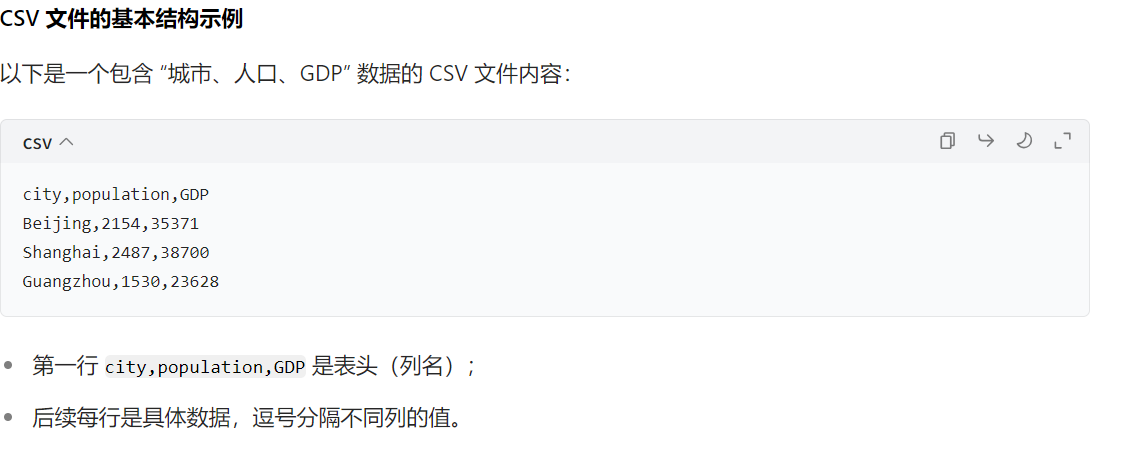

data.plot.scatter是PandasDataFrame 的绘图方法，专门用于创建散点图。
data.insert(0,'ones',1)插入截距项theta0
0：插入位置的索引（这里是第 0 列，即最左侧）
'ones'：新列的名称（字符串类型）
1：插入列的值（这里用常量 1 填充整列）

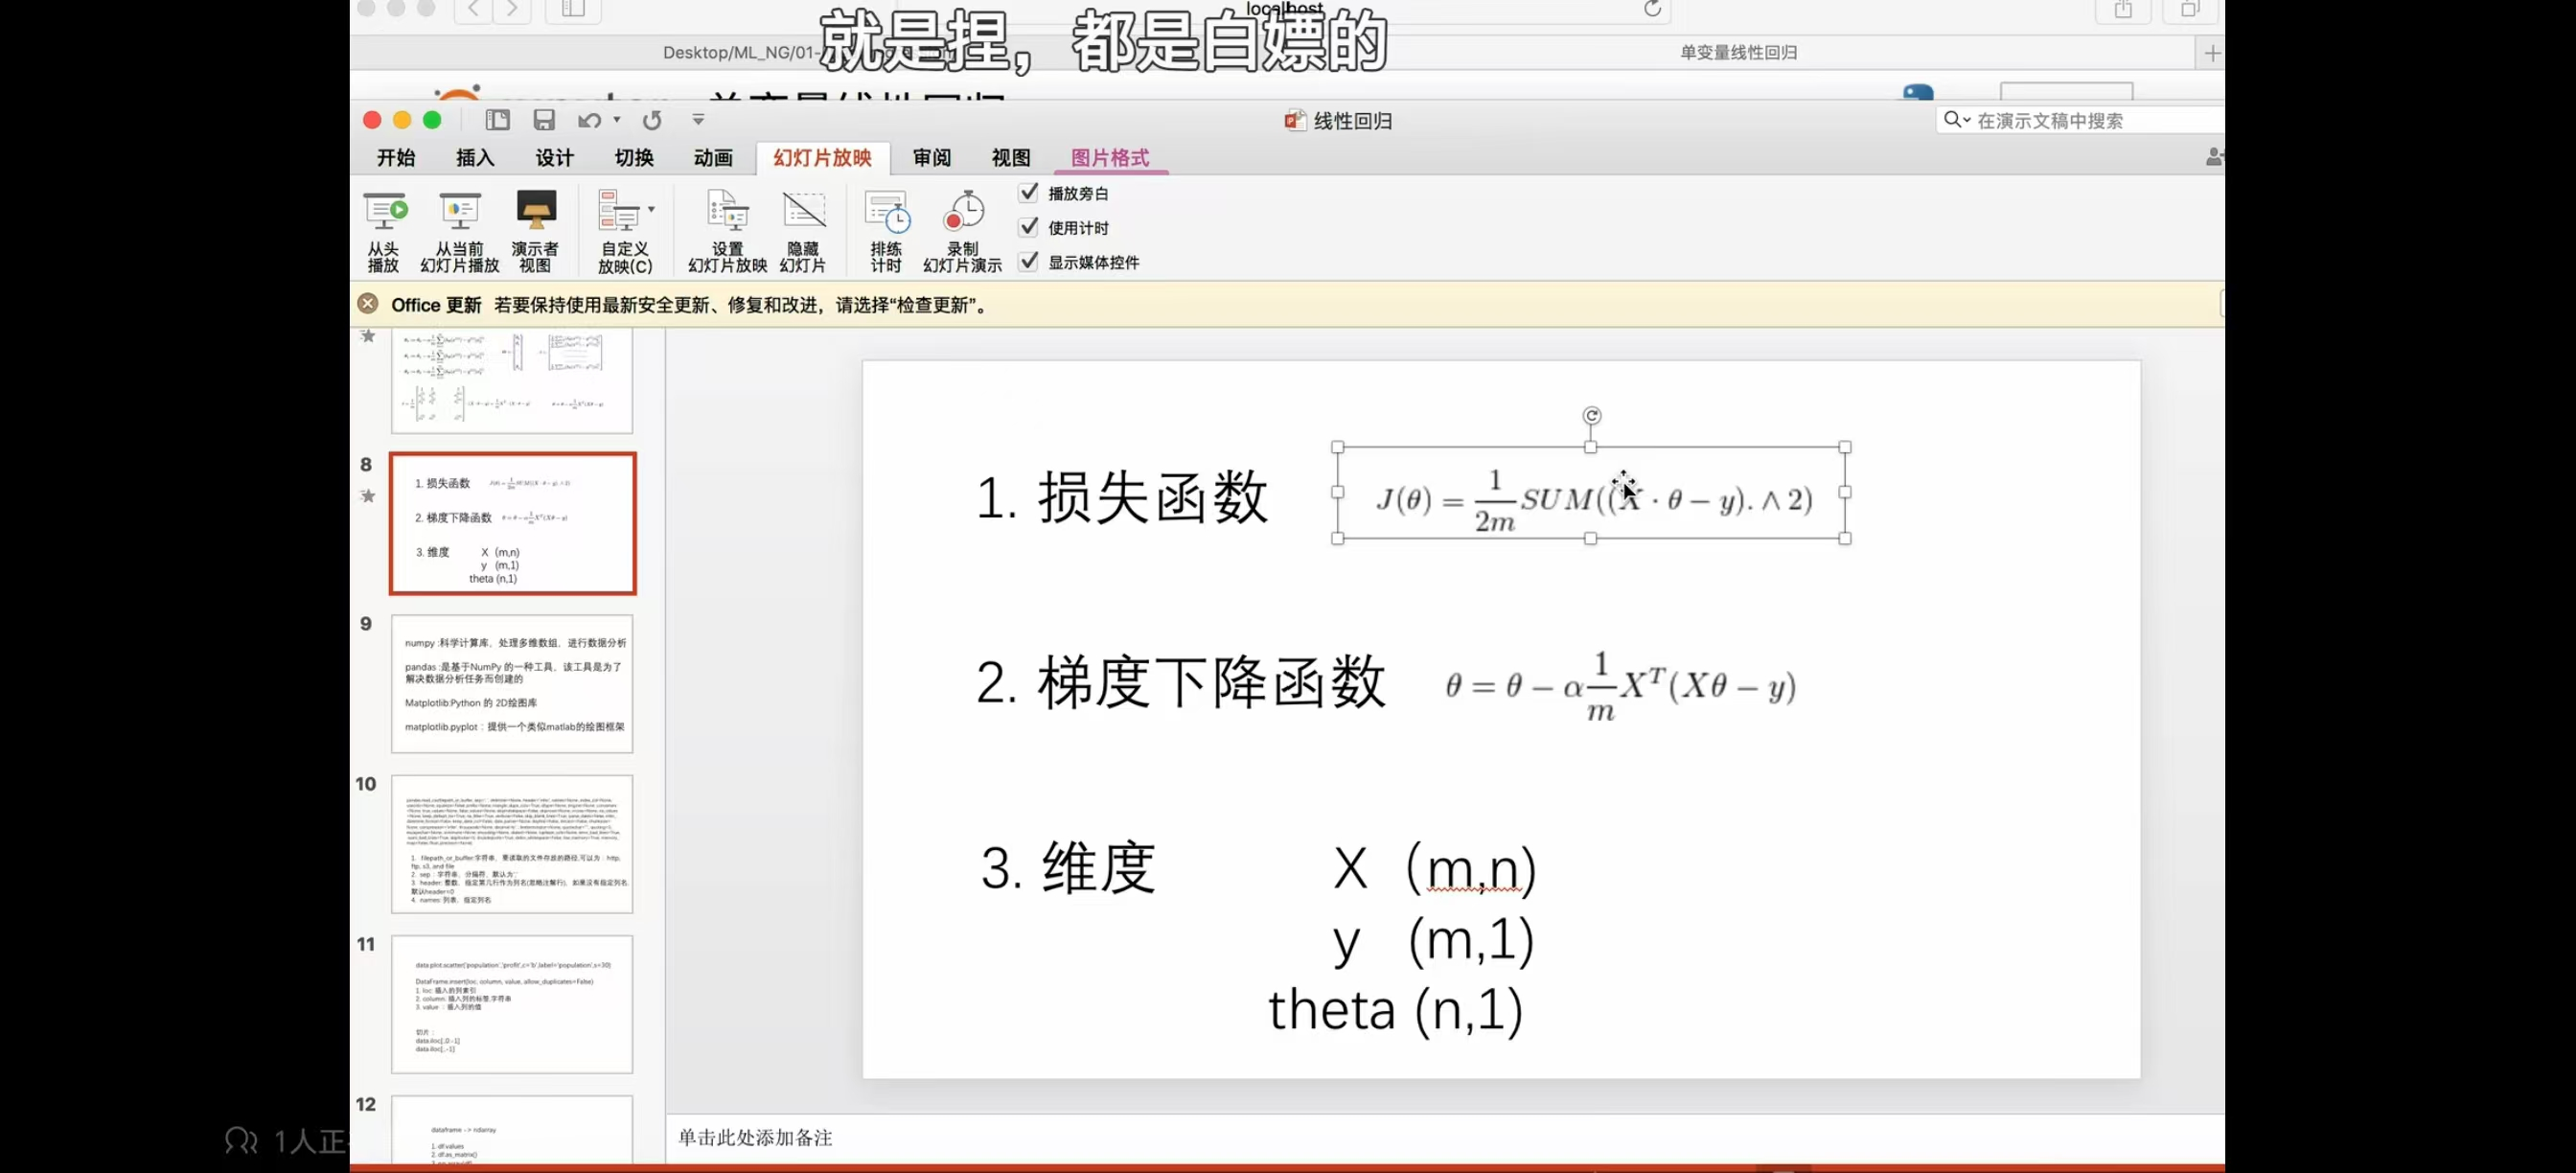
fig：代表整个图形（Figure），是可视化的顶级容器，包含所有的元素（如子图、标题、图例等）。
ax：代表一个子图（Axes），是实际绘图的区域，包含坐标轴、刻度、数据等。
# 创建2行3列的子图网格（共6个子图）
fig, axes = plt.subplots(2, 3)
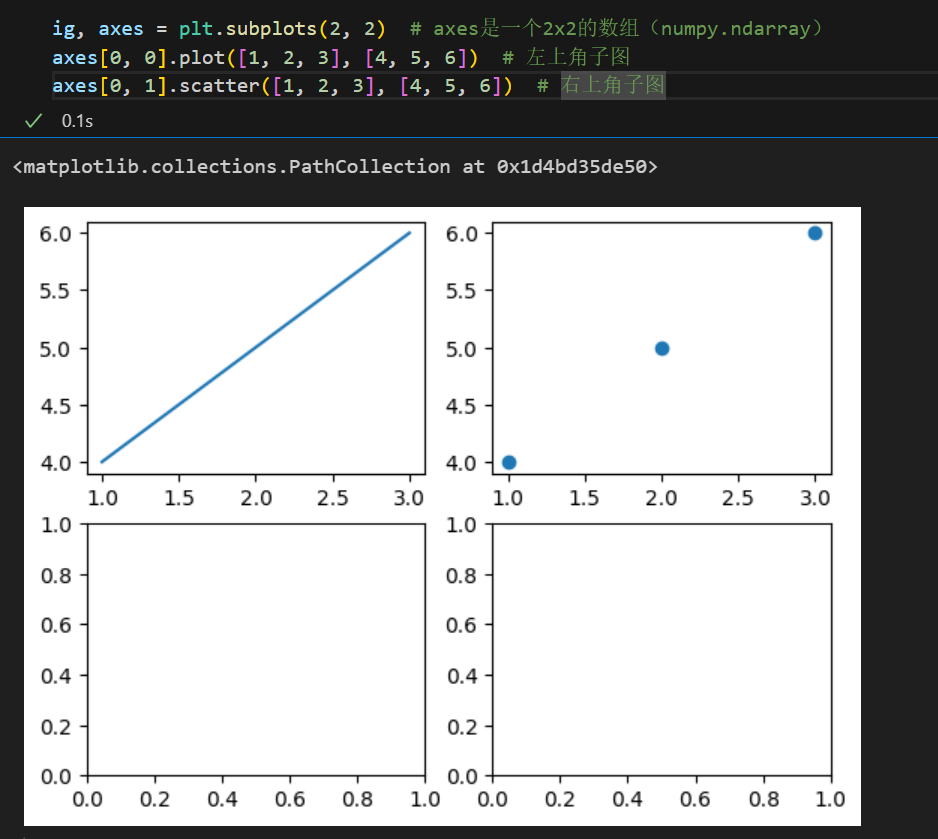


In [ ]:
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex1-linear regression\ex1data1.txt",header=None,names=['population','profit'])
data.insert(0,'ones',1)
data.plot.scatter('population','profit',label='population')
x=data.iloc[:,0:-1]#特征矩阵 x：包含除最后一列外的所有列（即所有输入特征）
y=data.iloc[:,-1]#目标向量 y：仅包含最后一列（即需要预测的变量）
plt.show()
x=np.array(x)#转化为数组
y=np.array(y)
y=y.reshape(len(y),1)#y转化为二维数组
def costFunction(x,y,theta):
    inner=np.power(x@theta-y,2)#矩阵乘法
    return np.sum(inner)/(2*len(x))
theta=np.zeros((2,1))
def tidu(x,y,theta,c,a):
    costs=[]
    for i in range(c):
        theta=theta-(x.T@(x@theta-y))/len(x)*a
        costs.append(costFunction(x,y,theta))
    return theta,costs
a=0.01
c=30000
theta,costs=tidu(x,y,theta,c,a)
fig,ax=plt.subplots()
ax.plot(np.arange(c),costs,c='r',ls='-',label='cv')#绘制损失函数
ax.set(xlabel='diedai',ylabel='costs',title='vs')
ax.legend()
plt.show()
x1=np.linspace(x.min(),x.max(),100)#这段代码会生成一个包含 100 个元素的一维数组x1，这个数组中的数值是在原数组x的最小值（x.min()）和最大值（x.max()）之间均匀分布的。
h=theta[0,0]+theta[1,0]*x1
fig,ax=plt.subplots()
ax.scatter(x[:,1],y,c='r',label='sandian')
ax.plot(x1,h,c='b',ls='--',label='predict')
ax.set(xlabel='populaiton',ylabel='profit',title='vs')
ax.legend()
plt.show()

                                                                 LinearRegression

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV

# 读取数据
data = pd.read_csv(
    r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex1-linear regression\ex1data1.txt",
    header=None, 
    names=['population', 'profit']
)
# 准备数据
x = data.iloc[:, 0:-1]#特征矩阵（包含偏置项ones和population），LinearRegression()会自动学习截距项
y = data.iloc[:, -1]#目标变量
# 转换为数组并划分训练集和测试集
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 训练模型
model = LinearRegression()
model.fit(x_train, y_train)

# 打印R²分数
print(f"训练集R²分数: {model.score(x_train, y_train):.4f}")
print(f"测试集R²分数: {model.score(x_test, y_test):.4f}")
# 可视化
plt.figure(figsize=(10, 6))
# 训练集用蓝色圆点
plt.scatter(
    x_train,  
    y_train, 
    color='blue', 
    label='Training Data',
    alpha=0.7
)
# 测试集用红色叉号
plt.scatter(
    x_test, 
    y_test, 
    color='red', 
    marker='x', 
    label='Test Data',
    alpha=0.7
)

x1 = np.linspace(5, 25, 100).reshape(-1,1)  # 变成 (100, 1) 的二维数组
y1 = model.predict(x1)

# 绘制直线
plt.plot(x1, y1, 'g-', label='Regression Line')

# 添加标签和标题
plt.xlabel('Population (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Linear Regression: Population vs Profit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

                                                               svr
                                        在分类问题中，svr1.score(x_train,y_train)是准确率，在回归问题中，svr1.score(x_train,y_train)是决定系数

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
# 读取数据
data = pd.read_csv(
    r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex1-linear regression\ex1data1.txt",
    header=None, 
    names=['population', 'profit']
)
# 准备数据
x = data.iloc[:, 0:-1]  # 特征矩阵（包含偏置项ones和population）
y = data.iloc[:, -1]    # 目标变量
# 转换为数组并划分训练集和测试集
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
p = {'C': [0.1, 1, 10,100], 'kernel': ['linear', 'rbf'],'gamma':[10,15,20,30,100]}
g=GridSearchCV(SVR(),p,cv=5)
g.fit(x_train, y_train)
print(g.best_params_)
print("交叉验证集得分",g.best_score_)
svr1=SVR(C=1.0,kernel='linear',gamma=10)
svr1.fit(x_train,y_train)
print(svr1.score(x_train,y_train))
print(svr1.score(x_test,y_test))
plt.scatter(x_train,y_train,c='blue')
plt.scatter(x_test,y_test,c='red')
x1 = np.linspace(5, 25, 100).reshape(-1,1)  # 变成 (100, 1) 的二维数组
y1 = model.predict(x1)
plt.plot(x1,y1)

                                                                决策树

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
data = pd.read_csv(
    r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex1-linear regression\ex1data1.txt",
    header=None, 
    names=['population', 'profit']
)
# 准备数据
x = data.iloc[:, 0:-1]  # 特征矩阵（包含偏置项ones和population）
y = data.iloc[:, -1]    # 目标变量
# 转换为数组并划分训练集和测试集
x = np.array(x)
y = np.array(y)
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
p={'max_features':[0.8,0.5,0.6],'max_depth':[1,2,3],'min_samples_leaf':[1,2,3],'min_samples_split':[7,5,6,4,2,3]}
g=GridSearchCV(DecisionTreeRegressor(),p,cv=5)
model=DecisionTreeRegressor(
    max_depth=3,
    max_features=0.8,
    min_samples_leaf=3,
    min_samples_split=7,
    random_state=42
)#可以替换成model=DecisionTreeRegressor(**g.best_params)
g.fit(x_train,y_train)
print(g.best_params_)
print(g.best_score_)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1=np.linspace(5,25,100)
x1=x1.reshape(-1,1)
plt.plot(x1,model.predict(x1),ls='-',c='g')
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='r')
plt.show()

                                                           随机森林

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv(
    r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex1-linear regression\ex1data1.txt",
    header=None, 
    names=['population', 'profit']
)
# 准备数据
x = data.iloc[:, 0:-1]  # 特征矩阵（包含偏置项ones和population）
y = data.iloc[:, -1]    # 目标变量
# 转换为数组并划分训练集和测试集
x = np.array(x)
y = np.array(y)
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
p={'n_estimators':[100,120,200,310,160,400],'max_depth':[1,2,4,5,6,7,8],'min_samples_leaf':[2,3,4,5,6,7,8],'min_samples_split':[5,6,4,7,8,10,2,3]}
model=RandomForestRegressor(
    n_estimators=100,
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)
#g=GridSearchCV(RandomForestRegressor(),p,cv=5)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1=np.linspace(5,25,100).reshape(-1,1)
plt.plot(x1,model.predict(x1),ls='-',c='g')
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='r')
plt.show()